In [1]:
# Fill in your name using the format below and student ID number
your_name = "Starr, Eliza"
student_id = "1420933"

In [2]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
#!pip install --quiet openml 

In [14]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
#tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

In [5]:
!pip install keras==2.3.0

     |████████████████████████████████| 377 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 269 kB 2.8 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-macosx_10_9_x86_64.whl size=44625 sha256=bc1788e7ac677b2f3a75691c8a561b405f3bef2789f942c67c95dc0cb490d862
  Stored in directory: /Users/elizastarr/Library/Caches/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built pyyaml


In [15]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [16]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Eliza, Looks good. You may continue :)


In [8]:
# my imports
from keras.regularizers import l1, l2, l1_l2
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from keras import callbacks

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [9]:
#base_dir = '/content/drive/My Drive/Colab Notebooks' # For Google Colab
base_dir = './'

In [10]:
#Uncomment to link Colab notebook to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [11]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache') #/content/cache

In [13]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [17]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [18]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

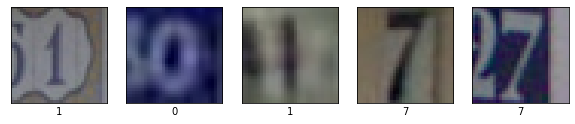

In [19]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [20]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)



### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [0]:
answer_q_1_1 = """
I experimented with following hyperparameter options: dense layers 3-9, nodes per layer 10-3000, epochs 3-50, and batch size 32-256.
Accuracy decreases with 3 more layers with 1000, 2000, and 3000 nodes, and accuracy peaks at batch size 128 and decreases with 64 and 256.
The model slightly overfits and accuracy begins to flatten past 40 epochs.
The resulting model has an acceptable validation accuracy of 79%.
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

Answer is 429 characters long


Training the model
Epoch 1/80
497/497 [==============================] - 2s 4ms/step - loss: 2.2361 - accuracy: 0.1879 - val_loss: 2.2624 - val_accuracy: 0.2058
Epoch 2/80
497/497 [==============================] - 2s 4ms/step - loss: 1.9298 - accuracy: 0.3086 - val_loss: 1.7786 - val_accuracy: 0.3777
Epoch 3/80
497/497 [==============================] - 2s 4ms/step - loss: 1.7016 - accuracy: 0.4027 - val_loss: 1.5965 - val_accuracy: 0.4490
Epoch 4/80
497/497 [==============================] - 2s 4ms/step - loss: 1.5538 - accuracy: 0.4676 - val_loss: 1.5413 - val_accuracy: 0.4634
Epoch 5/80
497/497 [==============================] - 2s 4ms/step - loss: 1.4198 - accuracy: 0.5274 - val_loss: 1.3166 - val_accuracy: 0.5715
Epoch 6/80
497/497 [==============================] - 2s 4ms/step - loss: 1.3169 - accuracy: 0.5702 - val_loss: 1.1934 - val_accuracy: 0.6165
Epoch 7/80
497/497 [==============================] - 2s 4ms/step - loss: 1.2474 - accuracy: 0.5940 - val_loss: 1.2398 - val_accu

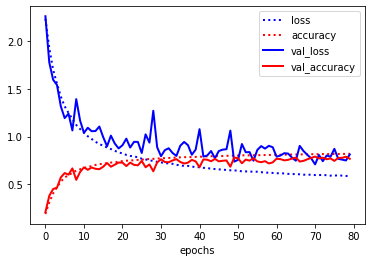

In [0]:
output = 10
scale = 2

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(output*scale**5, input_dim=(3072,), activation='relu'))
    model.add(layers.Dense(output*scale**4, activation='relu'))
    model.add(layers.Dense(output*scale**3, activation='relu'))
    model.add(layers.Dense(output*scale**2, activation='relu'))
    model.add(layers.Dense(output*scale**1, activation='relu'))
    model.add(layers.Dense(output*scale**0, activation='softmax'))
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, train=False, epochs=80, batch_size=128)


### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
answer_q_1_2 = """
After grayscaling the images the model overfits the data far more, but the accuracy slightly improves to 82%. 
Perhaps color is not important to the classification task, therefore the model is ignoring any unimportant patterns found from colors. 
This also reduces the dimensionality and parameters of the model. 
In higer dimensions the curse of dimensionality makes data sparse and difficult to classify, and more parameters requires more training data to avoid overfitting.

               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

Answer is 494 characters long


In [25]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

def preprocess(X):
    X_gray = rgb2gray(X)
    return X_gray

# Replace with the preprocessed data
preprocessed_split = preprocess(X_train), preprocess(X_val), y_train, y_val

In [0]:
# visualize the grayscale images
'''
def rgb2gray_reshape(X):
    X_gray = np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)
    return X_gray.reshape((X_gray.shape[0], 32, 32))

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [rgb2gray_reshape(X_train)[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random, grayscale=True)
'''

Loading model from file
Success!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 320)               328000    
_________________________________________________________________
dense_19 (Dense)             (None, 160)               51360     
_________________________________________________________________
dense_20 (Dense)             (None, 80)                12880     
_________________________________________________________________
dense_21 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_22 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_23 (Dense)     

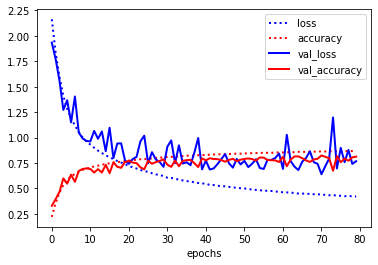

In [0]:
output = 10
scale = 2

# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32, 1)))
    model.add(layers.Dense(output*scale**5, input_dim=(1024,), activation='relu'))
    model.add(layers.Dense(output*scale**4, activation='relu'))
    model.add(layers.Dense(output*scale**3, activation='relu'))
    model.add(layers.Dense(output*scale**2, activation='relu'))
    model.add(layers.Dense(output*scale**1, activation='relu'))
    model.add(layers.Dense(output*scale**0, activation='softmax'))
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=80, batch_size=128)


### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

In [0]:
answer_q_1_3 = """
The best accuracy gain (to 83%) was achieved by adding a dropout layer with rate 0.2 before the last dense hidden layer, however this is not a large improvement.
Adding other dropout layer combinations or kernel, bias, and activity regularizers of types l1, l2, and l1_l2 did not improve performance.
I also tried to add batch normalization between dense layers and their activation functions, all combinations of which decreased validation accuracy.
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

Answer is 467 characters long


Loading model from file
Success!
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 320)               328000    
_________________________________________________________________
dense_31 (Dense)             (None, 160)               51360     
_________________________________________________________________
dense_32 (Dense)             (None, 80)                12880     
_________________________________________________________________
dense_33 (Dense)             (None, 40)                3240      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_34 (Dense)     

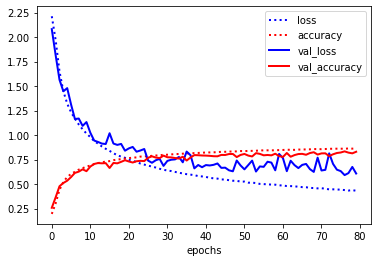

In [0]:
# Regularization (e.g. Dropout, L1/L2, Batch Normalization,...)
# model.add(layers.Dropout(0.5)) .2->.5
# gradually increase the amount of dropout. This forces layers deep in the model to regularize more than layers closer to the input.
# Regularizers allow to apply penalties on layer parameters or layer activity during optimization.
# kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None

'''
keras.regularizers.l1(0.1)
keras.regularizers.l2(0.1)
keras.regularizers.l1_l2(l1=0.01, l2=0.01)

l1: Activity is calculated as the sum of absolute values.
l2: Activity is calculated as the sum of the squared values.
l1_l2: Activity is calculated as the sum of absolute and sum of the squared values.
'''

#Batch normalization: Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

output = 10
scale = 2

def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32, 1)))
    model.add(layers.Dense(output*scale**5, input_dim=(1024,), activation='relu',
                           kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None))
    #model.add(layers.Dropout(0.2))
    model.add(layers.Dense(output*scale**4, activation='relu',
                           kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None))
    #model.add(layers.Dropout(0.4))
    model.add(layers.Dense(output*scale**3, activation='relu',
                           kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None))
    #model.add(layers.Dropout(0.3))
    model.add(layers.Dense(output*scale**2, activation='relu',
                           kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None))
    
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(output*scale**1,
                           kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None))#l1(0.01)))
    #model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Dense(output*scale**0, activation='softmax',
                           kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None))
    
    model.compile(optimizer=optimizers.RMSprop(lr=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=80, batch_size=128)


dropout(.2) at end: 0.819538 Accuracy


## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

In [0]:
answer_q_2_1 = """
The model performs with 95% accuracy, a large improvement from the dense networks.
I use three blocks of two covolutional layers, each with maxpooling, a dropout of 0.3, and zero-padding. The model uses a learning rate of 0.001
Maxpooling reduces resolution and increases translation invariance, dropout for regularization, and padding for building a deeper model.
The smaller learning rate improved the accuracy just slightly. 
It should also be noted that accuracy levels off after only 4-5 epochs, while the loss continues to decrease slightly.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

Answer is 564 characters long


In [0]:
def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.RMSprop(lr=1e-3),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

Loading model from file
Success!
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (Ma

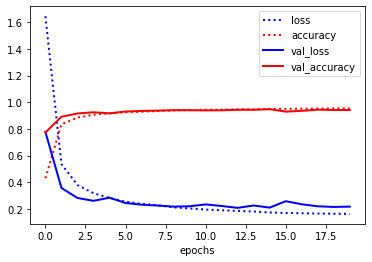

In [0]:
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=20, batch_size=128)


### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [0]:
answer_q_2_2 = """
Using a width and high shift of 0.1, accuracy is 95%.
Flipping, shearing, and rotating did not improve the results, and using large augmentations dramatically decreased accuracy.
It makes sense that flipping would not help in particular because it is likely very rare that street numbers are flipped.
Adding augmentation maintains validation accuracy but decreases training accuracy.
It also increases time until convergence.
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

Answer is 442 characters long


In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train_p, X_val_p, y_train_p, y_val_p = preprocessed_split

train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)

augmented_split = train_datagen.flow(X_train_p, y_train_p, batch_size=128), X_val_p, y_val_p

Loading model from file
Success!
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_73 (Ma

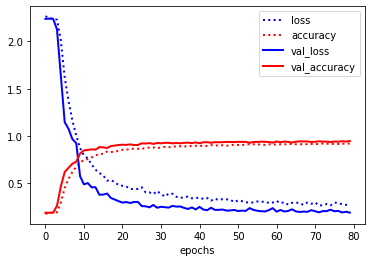

In [0]:
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, generator = True, epochs=80, batch_size=128)


## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [0]:
answer_q_3_1 = """
From the confusion matrix, one can see that 1 and 7 are confused the most often.
The misclassified images are nearly unintelligable to the human eye so it is understandable that the model could not classify.  
0: blurred or have a shadow
1: dark or have seriffs
2: blurred or have multiple numbers
3: pixelated and unintelligable
4: whited out or blurred
5: blur or have another number
6: blur
7: other numbers or high contrast
8: other numbers or blur
9: blur or in block letters
               """
print("Answer is {} characters long".format(len(answer_q_3_1)))

Answer is 497 characters long


In [49]:
model = load_model_from_file(base_dir, "model_2_2")
X_test_p = preprocess(X_test)
y_pred = model.predict(X_test_p)
misclassified_samples = np.nonzero( ((np.argmax(y_test, axis=1)+1)%10) != ((np.argmax(y_pred, axis=1)+1)%10) )[0]


#test_generator = train_datagen.flow(X_test_p, y_test, batch_size=128)
#model.evaluate(test_generator)

test_accuracy_3_1 = 0.94

In [50]:
misclassified_samples

array([   82,   104,   148, ..., 19831, 19839, 19846])

In [54]:
def plot_confusion_matrix():

    cm = confusion_matrix((np.argmax(y_test, axis=1)+1)%10, (np.argmax(y_pred, axis=1)+1)%10)
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
    ax.set_xticklabels(list([0,1,2,3,4,5,6,7,8,9]), rotation=45, ha="right")
    ax.set_yticklabels(list([0,1,2,3,4,5,6,7,8,9]))
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

def plot_misclassifications():
    label = 1
    fig, axes = plt.subplots(1, 5, figsize=(10, 5))
    count = 0
    for nr, i in enumerate(misclassified_samples):
        if count > 4:
          break
        elif (np.argmax(y_test[i])+1)%10 == label:  # if the actual label is of interest
          axes[count].imshow(X_test[i])
          axes[count].set_xlabel("Predicted: %s,\n Actual : %s" % ((np.argmax(y_pred[i]+1)%10), (np.argmax(y_test[i])+1)%10))
          axes[count].set_xticks(()), axes[count].set_yticks(())
          count += 1
    plt.show()

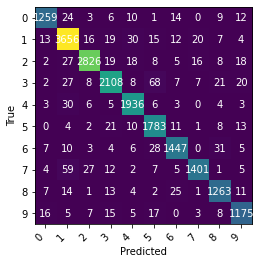

In [55]:
plot_confusion_matrix()

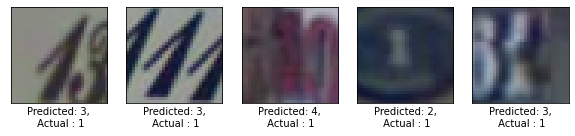

In [56]:
plot_misclassifications()

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [57]:
answer_q_3_2 = """
Filters 3, 4, 7, 12, 18, and 24 have no discernable patterns
Filter 6 highlights the numbers the most, whereas filter 9, 15, 20, 21, and 29 darken the outlines of the numbers.
Filters 14, 19, 22, 27, 28, 32 completely darkens the background and colored the numbers.
Filters 9, 20, and 25 highlight the backgrounds more than the other filters.
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

Answer is 359 characters long


In [58]:
img_tensor = X_test_p[0]
img_tensor_plotting = X_test[0]
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor_plotting = np.expand_dims(img_tensor_plotting, axis=0)
model = load_model_from_file(base_dir, "model_2_2") 

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:15]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [59]:
def plot_activations():
    for filter_num in range(32):
        plt.rcParams['figure.dpi'] = 120
        first_layer_activation = activations[0]

        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # 1 row, 2 columns
        ax1.imshow(img_tensor_plotting[0])
        ax2.matshow(first_layer_activation[0, :, :, filter_num], cmap='viridis')
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax2.set_xticks([])
        ax2.set_yticks([])
        ax1.set_xlabel('Input image')
        ax2.set_xlabel(filter_num+1)

/Users/elizastarr/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


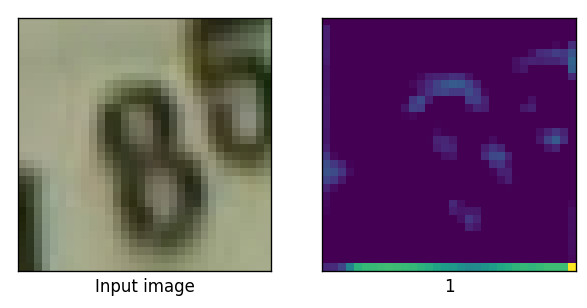

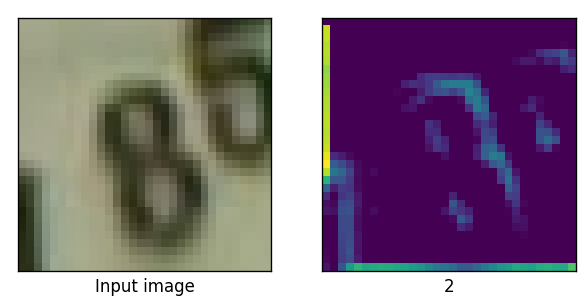

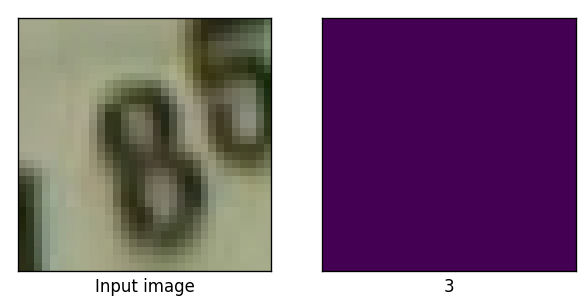

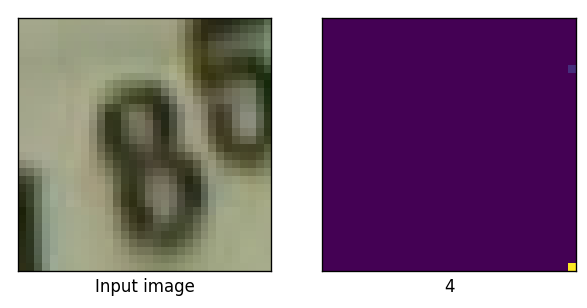

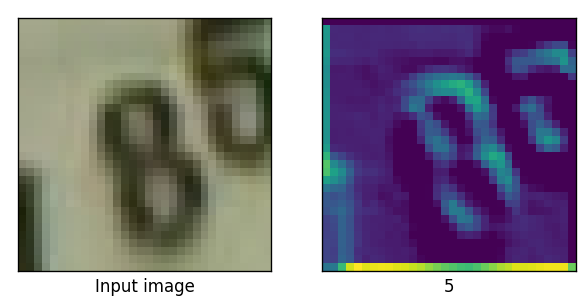

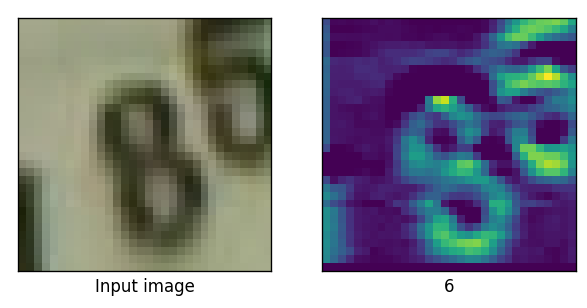

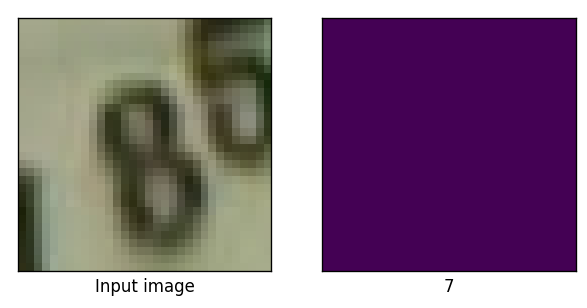

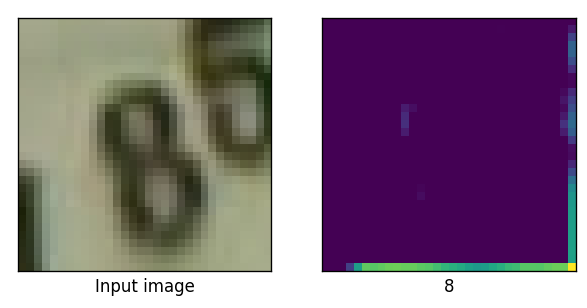

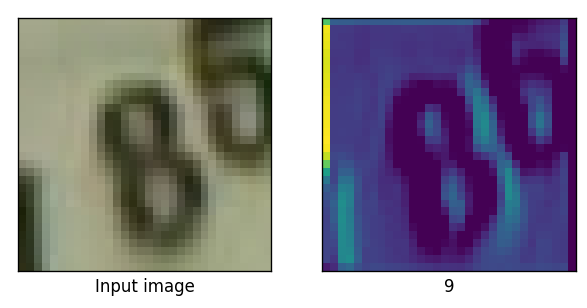

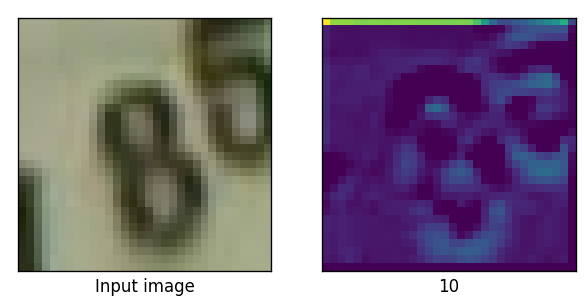

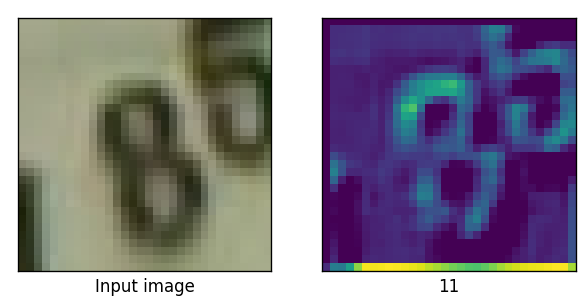

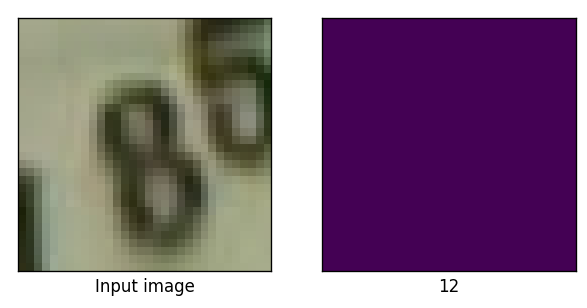

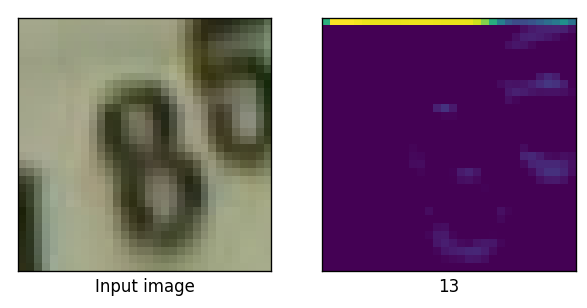

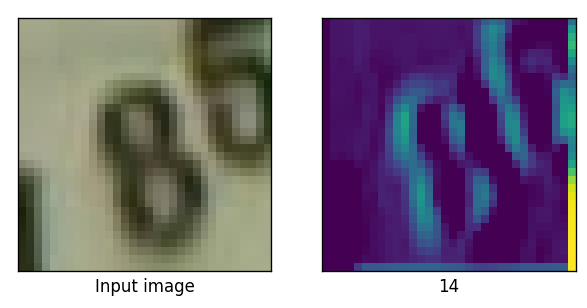

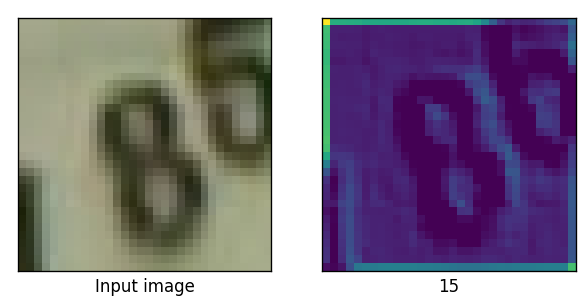

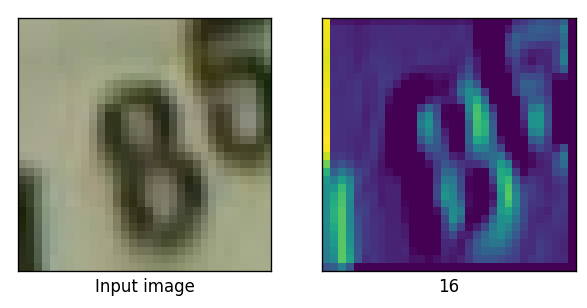

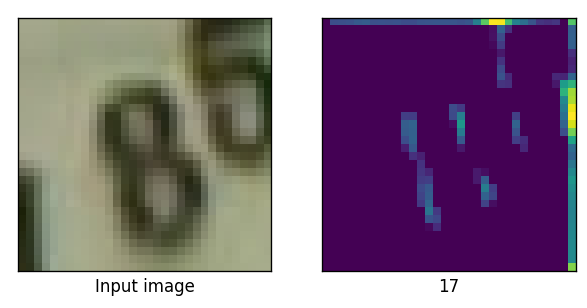

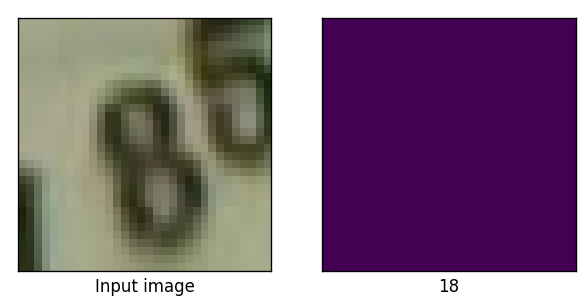

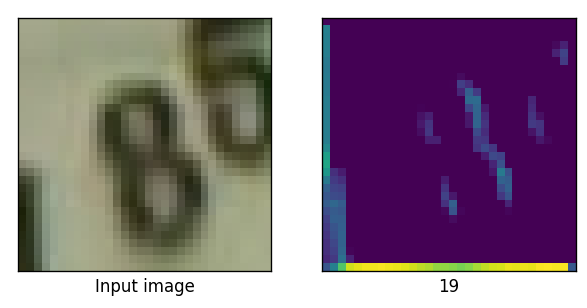

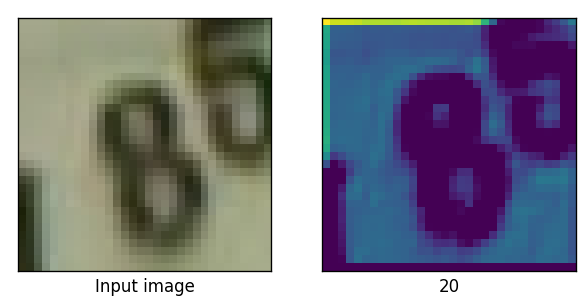

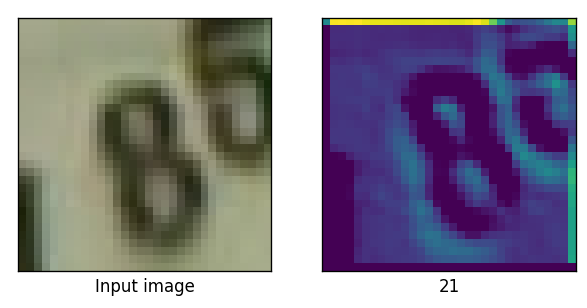

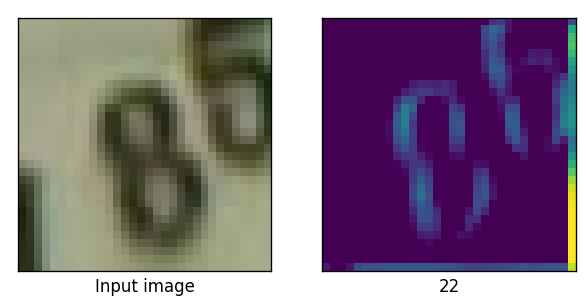

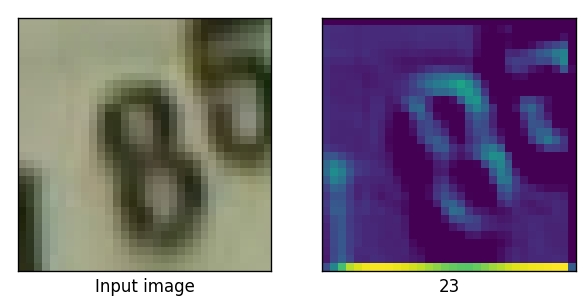

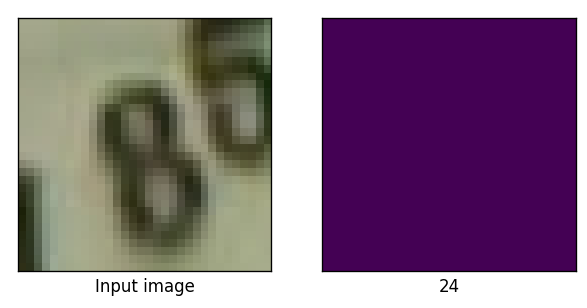

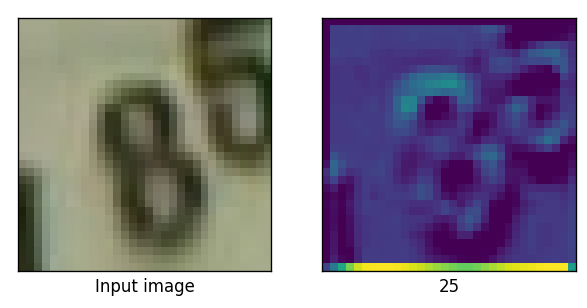

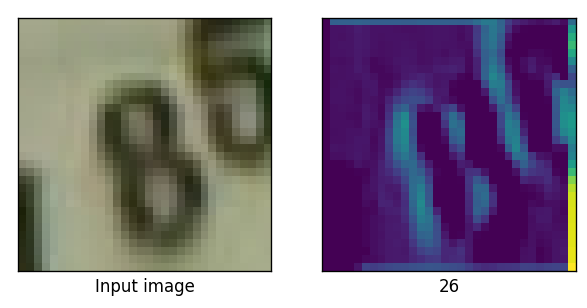

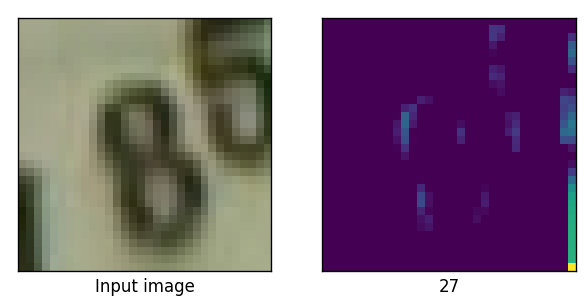

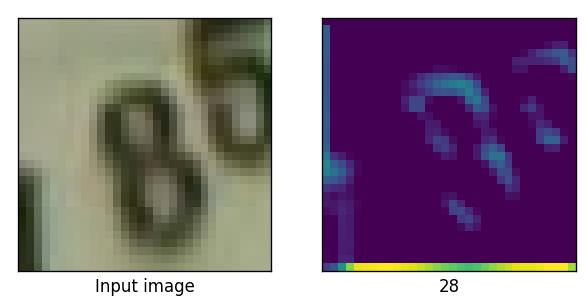

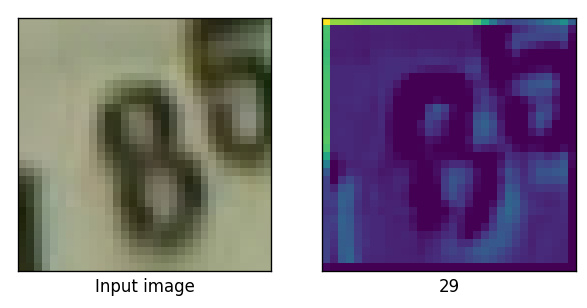

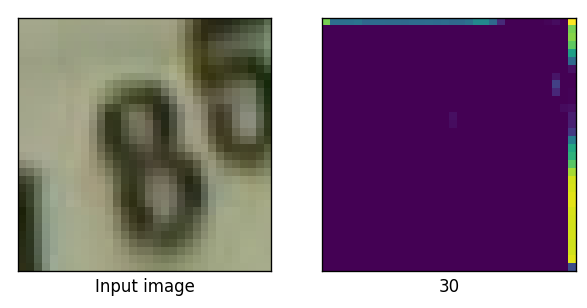

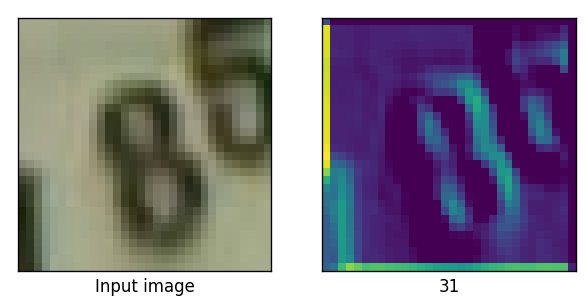

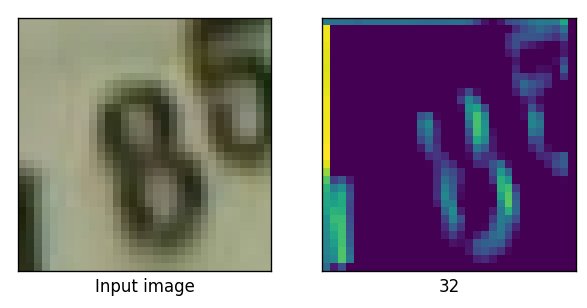

In [60]:
plot_activations()

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

In [61]:
X_test_p = preprocess(X_test)
img_tensor = X_test_p[0]
img_tensor_plotting = X_test[0]
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor_plotting = np.expand_dims(img_tensor_plotting, axis=0)
model = load_model_from_file(base_dir, "model_2_2") 

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:15]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)


images_per_row = 16

layer_names = []
for layer in model.layers[:15]:
    layer_names.append(layer.name)

def plot_3_3():
    layer_index = 9
    fig, axes = plt.subplots(1, 1,  figsize=(10, 5))
    img_tensor = X_test[0]
    axes.imshow(img_tensor)
    plt.show()
    
    start = layer_index
    end = layer_index+1
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

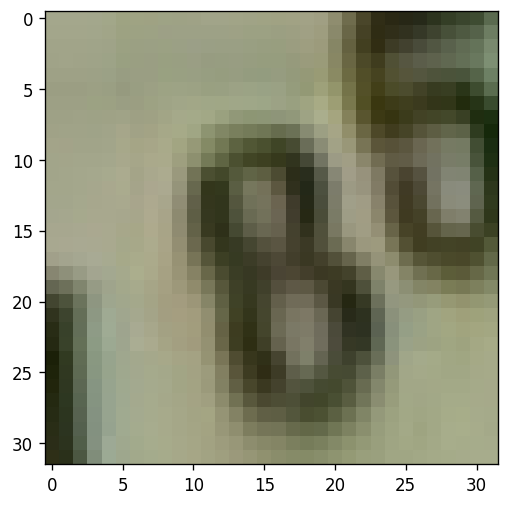

/Users/elizastarr/anaconda3/envs/datamining/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


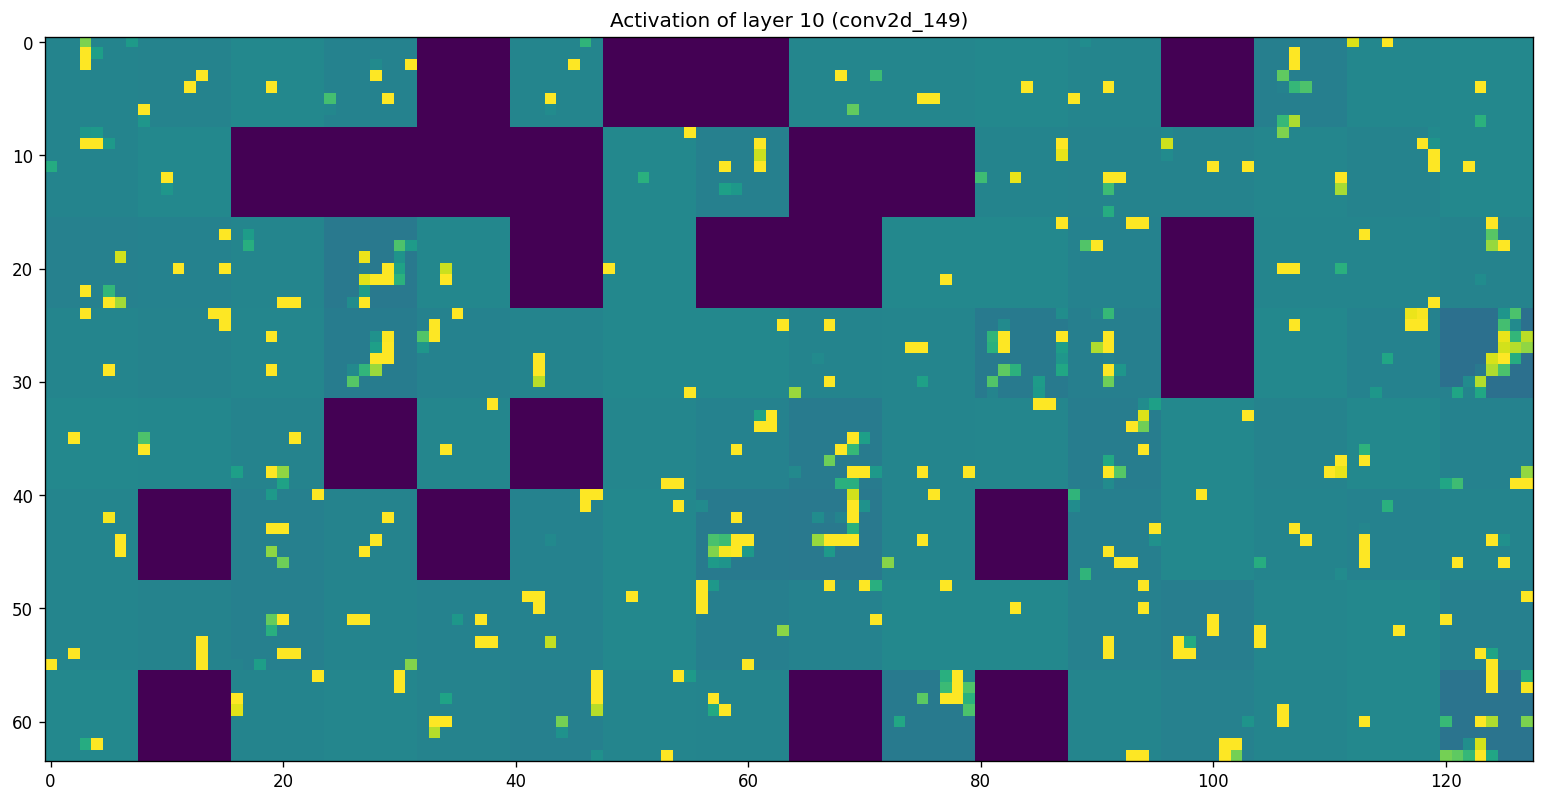

In [62]:
plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

In [21]:
import tensorflow as tf
keras = tf.keras

def build_model_4_1():
  # include_top=False does not import the dense layers
  base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(32,32,3), pooling=None, classes=1000)
  
  freeze = False

  # By freezing (layer.trainable = False), you prevent the weights in a given layer from being updated during training
  if freeze:
    # freezes the convolutional base
    base_model.trainable = False
  else:
    # unfreezes the last few convolutional layers
    for layer in base_model.layers:
      if layer.name in ['block5_conv1']: #,'block5_conv2','block5_conv3'
          layer.trainable = True
      else:
          layer.trainable = False

  # add a dense layer to the convolutional base
  model = tf.keras.Sequential()
  model.add(base_model)
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.RMSprop(lr=1e-5),
                metrics=['acc'])
           
  return model

In [0]:
answer_q_4_1 = """
               Unfreezing a covolutional layer imporves accuracy.
               The validation accuracy is 81% with layer block5_conv1 unfrozen, a layer of batch normalization, a dense hidden layer with 128 nodes, and a small learning rate (1e-5). 
               Having more than one unfrozen layer or a larger learning rate made the model overfit, and having multiple dense hidden layers with more nodes did not improve performance.
               The model starts to significantly overfit past 25 epochs.
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

Answer is 431 characters long


Training the model
Epoch 1/25
497/497 [==============================] - 9s 18ms/step - loss: 1.9789 - acc: 0.3240 - val_loss: 1.6143 - val_acc: 0.4752
Epoch 2/25
497/497 [==============================] - 9s 18ms/step - loss: 1.3956 - acc: 0.5440 - val_loss: 1.2521 - val_acc: 0.5969
Epoch 3/25
497/497 [==============================] - 9s 18ms/step - loss: 1.1369 - acc: 0.6300 - val_loss: 1.0713 - val_acc: 0.6493
Epoch 4/25
497/497 [==============================] - 9s 18ms/step - loss: 0.9874 - acc: 0.6785 - val_loss: 0.9710 - val_acc: 0.6821
Epoch 5/25
497/497 [==============================] - 9s 18ms/step - loss: 0.8888 - acc: 0.7096 - val_loss: 0.8897 - val_acc: 0.7106
Epoch 6/25
497/497 [==============================] - 9s 18ms/step - loss: 0.8164 - acc: 0.7341 - val_loss: 0.8311 - val_acc: 0.7278
Epoch 7/25
497/497 [==============================] - 9s 18ms/step - loss: 0.7583 - acc: 0.7543 - val_loss: 0.7874 - val_acc: 0.7421
Epoch 8/25
497/497 [==============================

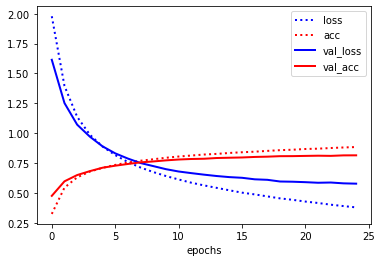

In [0]:
# Train the resulting model on the original (colored) training data
run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=True, epochs=25, batch_size=128)


### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [0]:
!pip install --quiet gama

In [67]:
import pickle
import gzip


import logging
import openml as oml
from packaging import version
import gama
from gama import GamaClassifier
from gama.postprocessing import EnsemblePostProcessing
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  PolynomialFeatures
from category_encoders.target_encoder import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import MultinomialNB

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

# called by store_embeddings
def extract_features(X, y, sample_count, base_model):
    features = np.zeros(shape=(sample_count, 1, 1, 512))
    labels = np.zeros(shape=(sample_count, 10))
    batch_size = 20

    datagen = ImageDataGenerator()#rescale=1./255
    generator = datagen.flow(
        x=X,
        y=y,
        batch_size=batch_size)
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

# called by evaluation_4_2
def store_embeddings(X_train, y_train, X_val, y_val, X_test, y_test):
  """ Stores all necessary embeddings to file
  """
  # load model 4.1
  model = load_model_from_file(base_dir, "model_4_1")

  # remove dense hidden layer
  base_model = model.layers[0]

  base_model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizers.RMSprop(lr=1e-5),
                  metrics=['acc'])

  train_features, train_labels = extract_features(X_train, y_train, 14000, base_model)
  validation_features, validation_labels = extract_features(X_val, y_val, 2000, base_model)
  test_features, test_labels = extract_features(X_test, y_test, 2000, base_model)

  store_embedding(train_features,'X_train_em')
  store_embedding(validation_features,'X_val_em')
  store_embedding(test_features,'X_test_em')

  store_embedding(train_labels,'y_train_em')
  store_embedding(validation_labels,'y_val_em')
  store_embedding(test_labels,'y_test_em')

def auto_ml_generate_pipeline(X_train, y_train, X_val, y_val):
    automl_with_ensemble = GamaClassifier(
        max_total_time=180,
        n_jobs=2,
        verbosity=logging.INFO,
        keep_analysis_log="covtype_ensemble.log",
        scoring='accuracy',
        post_processing_method=EnsemblePostProcessing(),  # Specify to build an ensemble after search
    )

    automl_with_ensemble.fit(X_train, y_train)
    score = automl_with_ensemble.score(X_val, y_val)

    best, = automl_with_ensemble._evaluation_library.n_best(1)
    best_pipeline = best.individual.pipeline
    
    return best_pipeline

def generate_pipeline():
  """ Returns an sklearn pipeline.
  Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. 
  You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. 
  You can do model selection using the validation set.
  Will use autoML here to test and return the best pipeline.
  """
  best_pipeline = Pipeline(memory=None,
         steps=[('3',
                 TargetEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               min_samples_leaf=1, return_df=True,
                               smoothing=1.0, verbose=0)),
                ('2',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               strategy='median', verbose=0)),
                ('1',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('0',
                 MultinomialNB(alpha=0.01, class_prior=None, fit_prior=False))],
         verbose=False)

  return best_pipeline

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pipeline.fit(X_train, y_train)
  avg_acc = cross_val_score(pipeline, X_test, y_test, cv=10).mean()
  return avg_acc


def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  
  # create and store embeddings
  #store_embeddings(X_train, y_train, X_val, y_val, X_test, y_test)
  print('Stored embeddings')

  # retrieve and transform embeddings
  X_train_em = np.reshape(load_embedding('X_train_em'), (14000, 512))
  y_train_em = np.argmax(load_embedding('y_train_em'), axis=1)
  X_val_em = np.reshape(load_embedding('X_val_em'), (2000, 512))
  y_val_em = np.argmax(load_embedding('y_val_em'), axis=1)
  X_test_em = np.reshape(load_embedding('X_test_em'), (2000, 512))
  y_test_em = np.argmax(load_embedding('y_test_em'), axis=1)
  print('Retrieved embeddings')

  # Find and return the best pipeline using gamma AutoML
  # pipeline = auto_ml_generate_pipeline(X_train_em, y_train_em, X_val_em, y_val_em)
  pipeline = generate_pipeline()
  print('generated pipeline')

  # Train and evaluate the pipeline on the training and test data
  score = evaluate_pipeline(pipeline, X_train_em, y_train_em, X_test_em, y_test_em)
  print('evaluated pipeline')

  return score

answer_q_4_2 = """
               I used a sample of 14000 training 2000 validation and test embeddings with the Gamma auto ML tool to find the best pipeline. 
               The result was a multiniminalNB using the TargetEncoder, SimpleImputer, and PolynomialFeatures, 
               despite it not making logical sense to use the encoder and imputer.
               Using 10-fold cross validation, the test accuracy was 78.1%, which is not as good as some of the previous models.
               """

print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('3',
                 TargetEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               min_samples_leaf=1, return_df=True,
                               smoothing=1.0, verbose=0)),
                ('2',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('1',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('0',
                 MultinomialNB(alpha=0.01, class_prior=None, fit_prior=False))],
         verbose=False)
Answer is 481 characters long


In [68]:
# evaluation_4_2(X_train, y_train, X_test, y_test)